In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv im

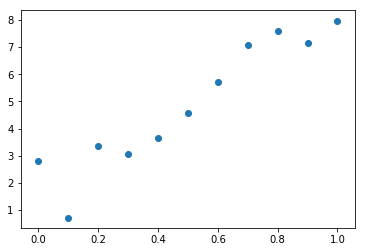

In [6]:
# Observed data
np.random.seed(180610)
n = 11
_a = 6
_b = 2

x = np.linspace(0,1,n)
y = _a*x + _b + np.random.randn(n)
plt.scatter(x,y)
plt.show()

In [11]:
# 사후분포 샘플링
niter = 10000
with pm.Model() as linreg:
    a = pm.Normal('a', mu=0, sd=100)
    b = pm.Normal('b', mu=0, sd=100)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace = pm.sample(niter, start=start, njobs=2, random_seed=180610)

logp = -23.943, ||grad|| = 0.0057486: 100%|███| 24/24 [00:00<00:00, 259.77it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, b, a]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8795588182131236, but should be close to 0.8. Try to increase the number of tuning steps.


In [17]:
print('Estimated parameters using MAP : a={:.1f}, b={:.1f}, sigma={:.1f}'.format(start['a'], start['b'], start['sigma']))
print('Actual parameters : a={:}, b={:}, sigma={:}'.format(_a,_b,1))

Estimated parameters using MAP : a=6.7, b=1.5, sigma=0.7
Actual parameters : a=6, b=2, sigma=1


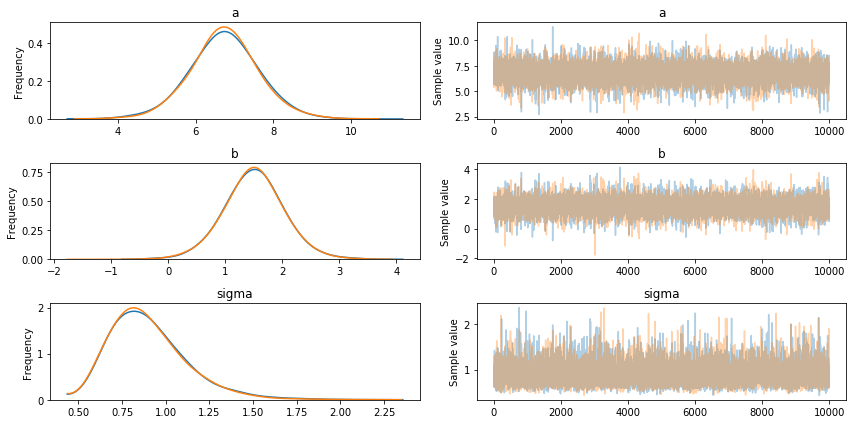

In [15]:
tr = trace[niter//2:]
pm.traceplot(trace, varnames=['a','b','sigma'])
pass

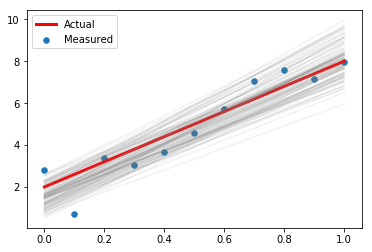

In [22]:
plt.scatter(x, y, s=30, label='Measured')
plt.plot(x, _a*x + _b, label='Actual', lw=3, c='red')
for a_, b_ in zip(tr['a'], tr['b'][-100:]):
    plt.plot(x, a_*x+b_, c='gray', alpha=0.1)
plt.legend()
plt.show()